# Workspace settings

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import print_function
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import sample,randint
batch_size = 1000
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
channels=1
class_names = ["0","1","2","3","4","5","6","7","8","9"]

# Import data

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape= (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualize Data

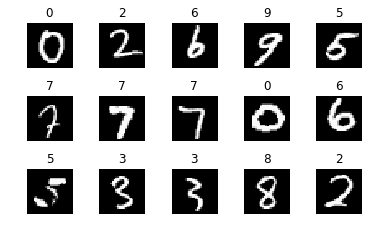

In [0]:
def draw_sample(X, y, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        n=randint(0,x_train.shape[0]-1000)
        plt.subplot(rows, cols, i+1)
        img = X[n+i].reshape(input_shape)
        if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
          img=img.reshape(img_rows,img_cols)
        plt.imshow(img, cmap='gray' if channels==1 else "gnuplot")
        plt.title("{}".format(class_names[np.argmax(y[n+i])]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

draw_sample(x_train, y_train, 3, 5)

# Make model

In [0]:
model = keras.Sequential(name="MNIST_BASIC")
model.add(keras.layers.Flatten(input_shape=input_shape))

# try changing the numbers of units
# then the activation function (relu, elu, selu, softmax, softplus, softsign, tanh, sigmoid, hard_sigmoid, exponential, linear)
model.add(keras.layers.Dense(128, activation='relu')) 

model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "MNIST_BASIC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Run model

In [0]:
H=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)


Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7652 - accuracy: 0.7982
Epoch 2/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.3078 - accuracy: 0.9148
Epoch 3/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2503 - accuracy: 0.9303
Epoch 4/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2135 - accuracy: 0.9416
Epoch 5/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1874 - accuracy: 0.9478
Epoch 6/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1667 - accuracy: 0.9538
Epoch 7/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1494 - accuracy: 0.9588
Epoch 8/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1355 - accuracy: 0.9620
Epoch 9/12
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1235 - accuracy: 0.9660
Epoch 10/12
60000/6000

# Evaluate Model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10920715552419424
Test accuracy: 0.9675


# Make Predictions

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



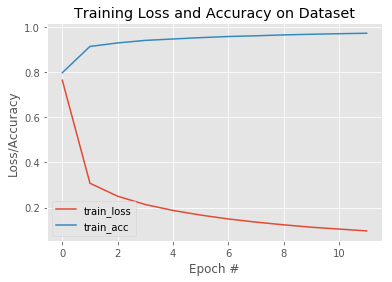

In [0]:
predictions = model.predict(x_test)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
	target_names=class_names))
 
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# Display data

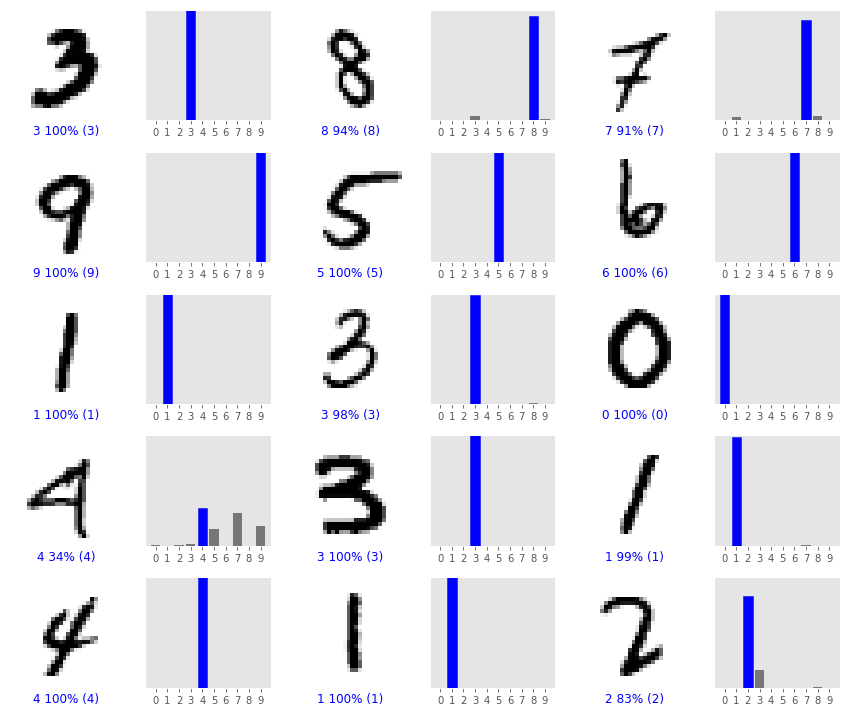

In [0]:
def plot_image(i, predictions_array, true_label, img):
    prediction, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
      img=img.reshape(img_rows,img_cols)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    true_label=np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(prediction),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    prediction, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
index=0
for i in sample(range(x_test.shape[0]), num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 2)
    plot_value_array(i, predictions, y_test)
    index+=1
plt.tight_layout()
plt.show()
